In [1]:
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree
from cryofib.data_loaders import load_F107_A1_pred, load_F107_A1_multicut

In [3]:
def fast_count_unique(array: np.array):
    if array.dtype is not np.int64:
        print(f"array type is {array.dtype}. Converting to int64, possibly can cause errors")
    n_features = int(np.max(array))
    counts = np.bincount(array.flatten().astype(np.int64), minlength=n_features + 1)
    return np.arange(n_features + 1), counts

In [4]:
f_multi = load_F107_A1_multicut()

In [5]:
print_key_tree(f_multi)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
3D_s0_quantile_norm
3D_s0_quantile_norm/ws
3D_s0_quantile_norm/multicut_0.5
3D_s0_quantile_norm/multicut_0.6
3D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm_averaged
2D_s0_quantile_norm_averaged/multicut_0.3
2D_s0_quantile_norm_averaged/multicut_extra_0.3
2D_s0_quantile_norm_averaged/multicut_0.7
2D_s0_quantile_norm_averaged/multicut_0.5
2D_s0_quantile_norm_averaged/multicut_extra_0.7
2D_s0_quantile_norm_averaged/multicut_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.5
2D_s0_quantile_norm_averaged/multicut_0.6
2D_s0_quantile_norm_averaged/multicut_extra_0.6
2D_s0_quantile_norm_averaged/ws
2D_s0_quantile_norm
2D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm/ws
2D_s0_quantile_norm/multicut_0.5
2D_s0_quantile_norm/multicut_0.6


In [6]:
roi = np.s_[:]
multicut = read_volume(f_multi, "2D_s0_quantile_norm_averaged/multicut_extra_0.6", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 2D_s0_quantile_norm_averaged/multicut_extra_0.6 from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint64


In [7]:
indices, counts = fast_count_unique(multicut)

array type is uint64. Converting to int64, possibly can cause errors


In [24]:
counts_nonzero = counts[1:][counts[1:] > 0]

(array([1.2100e+02, 0.0000e+00, 0.0000e+00, 1.7400e+02, 0.0000e+00,
        8.9000e+01, 0.0000e+00, 1.0400e+02, 9.4000e+01, 1.2600e+02,
        9.2000e+01, 1.8400e+02, 2.2200e+02, 2.0300e+02, 3.2100e+02,
        3.8900e+02, 4.1800e+02, 4.9500e+02, 6.2400e+02, 8.2900e+02,
        1.4240e+03, 2.3210e+03, 3.1780e+03, 4.9230e+03, 8.9340e+03,
        1.4888e+04, 1.5562e+04, 1.6558e+04, 1.6121e+04, 1.5881e+04,
        1.4438e+04, 1.2960e+04, 1.1233e+04, 9.0200e+03, 7.7030e+03,
        6.2640e+03, 5.2500e+03, 4.3460e+03, 3.5750e+03, 2.9610e+03,
        2.4140e+03, 1.8760e+03, 1.2750e+03, 9.4600e+02, 7.0900e+02,
        5.1100e+02, 3.4500e+02, 2.3500e+02, 1.8200e+02, 1.7000e+02,
        1.5700e+02, 1.3900e+02, 9.0000e+01, 8.9000e+01, 8.0000e+01,
        8.6000e+01, 5.2000e+01, 4.2000e+01, 5.3000e+01, 4.1000e+01,
        4.6000e+01, 2.7000e+01, 2.5000e+01, 2.1000e+01, 3.3000e+01,
        2.1000e+01, 2.4000e+01, 1.7000e+01, 2.1000e+01, 2.4000e+01,
        1.6000e+01, 1.5000e+01, 2.1000e+01, 1.50

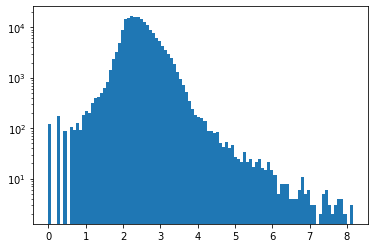

In [27]:
plt.hist(np.log10(counts_nonzero), bins=100, log=True)

In [26]:
len(counts_nonzero)

191964